In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Travel.csv', header=0)

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.shape

(4888, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

# Value counts for qualitative data

In [6]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [7]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [9]:
df['Gender'] = df['Gender'].str.replace('Fe Male','Female')
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [10]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [11]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [12]:
df['MaritalStatus'] = df['MaritalStatus'].str.replace('Single','Unmarried')
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [13]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

# One-Hot Encoding

In [14]:
df = pd.get_dummies(df, columns= ["TypeofContact", "Occupation", "Gender", "ProductPitched", "MaritalStatus", "Designation"], drop_first=True)

In [15]:
df.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,...,True,False,False,False,False,True,False,True,False,False
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,...,True,False,False,False,False,False,False,True,False,False
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,...,False,False,False,False,False,True,True,False,False,False
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,...,False,False,False,False,False,False,True,False,False,False
4,200004,0,NaN,1,8.0,2,3.0,4.0,1.0,0,...,False,False,False,False,False,False,True,False,False,False


In [18]:
df.info().dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   4888 non-null   int64  
 1   ProdTaken                    4888 non-null   int64  
 2   Age                          4662 non-null   float64
 3   CityTier                     4888 non-null   int64  
 4   DurationOfPitch              4637 non-null   float64
 5   NumberOfPersonVisiting       4888 non-null   int64  
 6   NumberOfFollowups            4843 non-null   float64
 7   PreferredPropertyStar        4862 non-null   float64
 8   NumberOfTrips                4748 non-null   float64
 9   Passport                     4888 non-null   int64  
 10  PitchSatisfactionScore       4888 non-null   int64  
 11  OwnCar                       4888 non-null   int64  
 12  NumberOfChildrenVisiting     4822 non-null   float64
 13  MonthlyIncome     

AttributeError: 'NoneType' object has no attribute 'dtype'

In [17]:
# Converting bool to int
df['ProductPitched_Deluxe'] = df['ProductPitched_Deluxe'].astype('int')
df['ProductPitched_King'] = df['ProductPitched_King'].astype('int')
df['ProductPitched_Standard'] = df['ProductPitched_Standard'].astype('int')
df['ProductPitched_Super Deluxe'] = df['ProductPitched_Super Deluxe'].astype('int')
df['MaritalStatus_Married'] = df['MaritalStatus_Married'].astype('int')
df['MaritalStatus_Unmarried'] = df['MaritalStatus_Unmarried'].astype('int')
df['Designation_Executive'] = df['Designation_Executive'].astype('int')
df['Designation_Manager'] = df['Designation_Manager'].astype('int')
df['Designation_Senior Manager'] = df['Designation_Senior Manager'].astype('int')
df['Designation_VP'] = df['Designation_VP'].astype('int')
df['Occupation_Large Business'] = df['Occupation_Large Business'].astype('int')
df['Occupation_Salaried'] = df['Occupation_Salaried'].astype('int')
df['Occupation_Small Business'] = df['Occupation_Small Business'].astype('int')
df['Gender_Male'] = df['Gender_Male'].astype('int')

In [19]:
df.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,...,1,0,0,0,0,1,0,1,0,0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,...,1,0,0,0,0,0,0,1,0,0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,...,0,0,0,0,0,1,1,0,0,0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,...,0,0,0,0,0,0,1,0,0,0
4,200004,0,NaN,1,8.0,2,3.0,4.0,1.0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
df.isnull().sum()

CustomerID                       0
ProdTaken                        0
Age                            226
CityTier                         0
DurationOfPitch                251
NumberOfPersonVisiting           0
NumberOfFollowups               45
PreferredPropertyStar           26
NumberOfTrips                  140
Passport                         0
PitchSatisfactionScore           0
OwnCar                           0
NumberOfChildrenVisiting        66
MonthlyIncome                  233
TypeofContact_Self Enquiry       0
Occupation_Large Business        0
Occupation_Salaried              0
Occupation_Small Business        0
Gender_Male                      0
ProductPitched_Deluxe            0
ProductPitched_King              0
ProductPitched_Standard          0
ProductPitched_Super Deluxe      0
MaritalStatus_Married            0
MaritalStatus_Unmarried          0
Designation_Executive            0
Designation_Manager              0
Designation_Senior Manager       0
Designation_VP      

C:\Users\Sharath\AppData\Local\Temp\ipykernel_5176\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

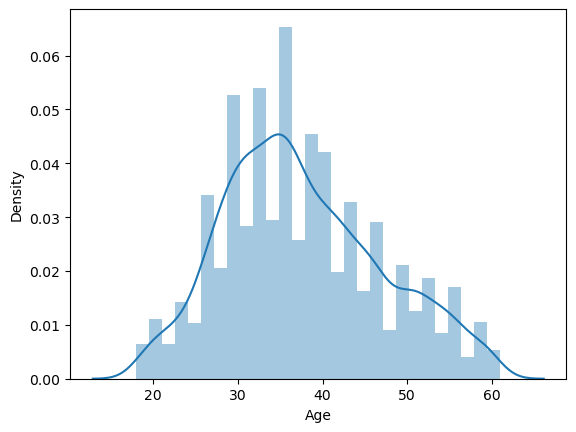

In [21]:
sns.distplot(df['Age'])

C:\Users\Sharath\AppData\Local\Temp\ipykernel_5176\782529970.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DurationOfPitch'])


<Axes: xlabel='DurationOfPitch', ylabel='Density'>

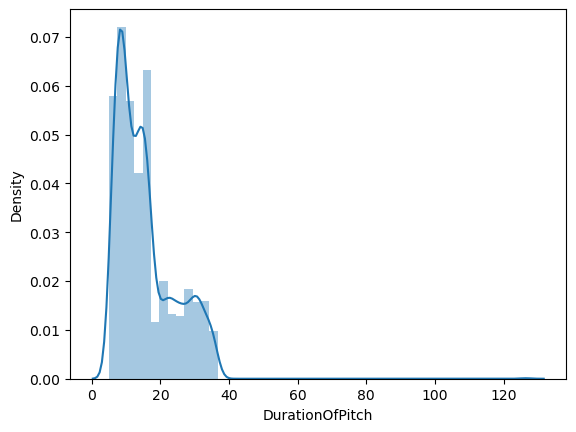

In [22]:
sns.distplot(df['DurationOfPitch'])

In [23]:
df['DurationOfPitch'].value_counts()

DurationOfPitch
9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
10.0     244
13.0     223
11.0     205
12.0     195
17.0     172
30.0      95
22.0      89
31.0      83
23.0      79
18.0      75
29.0      74
32.0      74
25.0      73
21.0      73
27.0      72
26.0      72
24.0      70
35.0      66
20.0      65
28.0      61
33.0      57
19.0      57
34.0      50
36.0      44
5.0        6
126.0      1
127.0      1
Name: count, dtype: int64

In [24]:
df['DurationOfPitch'].median()

13.0

<Axes: xlabel='NumberOfFollowups'>

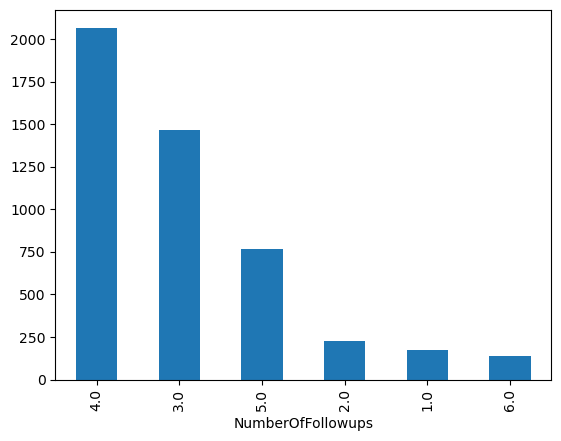

In [25]:
df['NumberOfFollowups'].value_counts().plot(kind='bar')

In [26]:
df['NumberOfFollowups'].median()

4.0

<Axes: xlabel='NumberOfChildrenVisiting'>

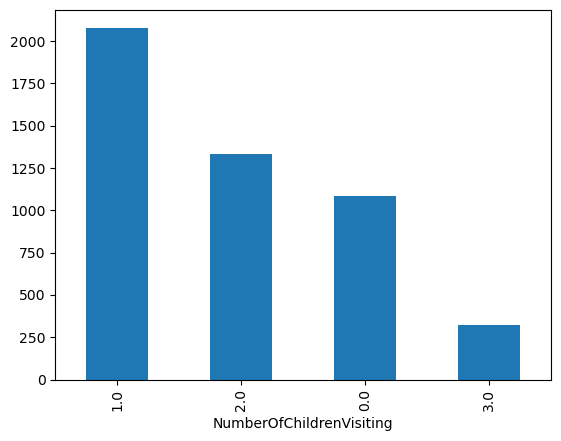

In [27]:
df['NumberOfChildrenVisiting'].value_counts().plot(kind='bar')

In [28]:
df['NumberOfChildrenVisiting'].median()

1.0

In [29]:
df['MonthlyIncome'].value_counts()

MonthlyIncome
20855.0    7
21288.0    7
17342.0    7
21020.0    7
24950.0    6
          ..
17074.0    1
24250.0    1
21077.0    1
24714.0    1
21471.0    1
Name: count, Length: 2475, dtype: int64

In [30]:
df['MonthlyIncome'].mean()

23619.85349087003

<Axes: xlabel='PreferredPropertyStar'>

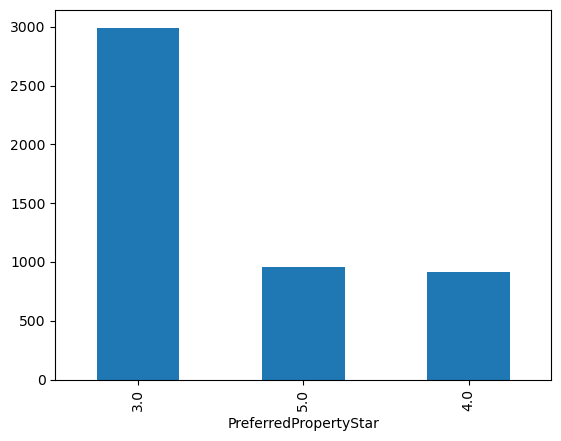

In [31]:
df['PreferredPropertyStar'].value_counts().plot(kind='bar')

In [32]:
df['PreferredPropertyStar'].median()

3.0

<Axes: xlabel='NumberOfTrips'>

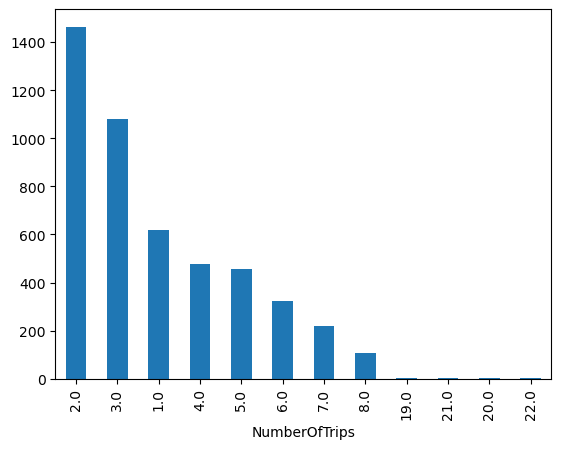

In [33]:
df['NumberOfTrips'].value_counts().plot(kind='bar')

In [34]:
df['NumberOfTrips'].median()

3.0

<Axes: xlabel='OwnCar', ylabel='count'>

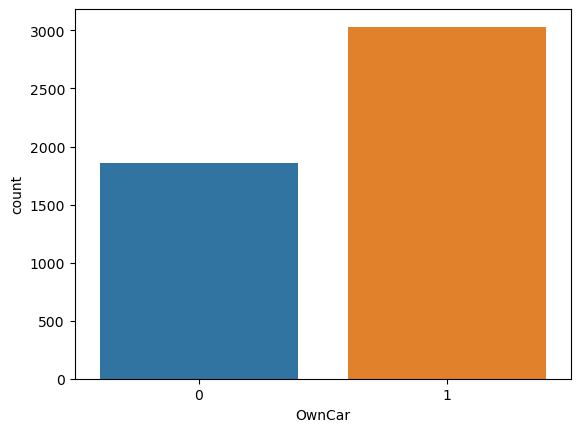

In [35]:
sns.countplot(x="OwnCar", data=df)

In [36]:
# Missing Value Imputation
df['Age']= df['Age'].fillna(df['Age'].median())
df['DurationOfPitch']= df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())
df['NumberOfFollowups']= df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].median())
df['NumberOfTrips']= df['NumberOfTrips'].fillna(df['NumberOfTrips'].median())
df['PreferredPropertyStar']= df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].median())
df['NumberOfChildrenVisiting']= df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].median())
df['MonthlyIncome']= df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   4888 non-null   int64  
 1   ProdTaken                    4888 non-null   int64  
 2   Age                          4888 non-null   float64
 3   CityTier                     4888 non-null   int64  
 4   DurationOfPitch              4888 non-null   float64
 5   NumberOfPersonVisiting       4888 non-null   int64  
 6   NumberOfFollowups            4888 non-null   float64
 7   PreferredPropertyStar        4888 non-null   float64
 8   NumberOfTrips                4888 non-null   float64
 9   Passport                     4888 non-null   int64  
 10  PitchSatisfactionScore       4888 non-null   int64  
 11  OwnCar                       4888 non-null   int64  
 12  NumberOfChildrenVisiting     4888 non-null   float64
 13  MonthlyIncome     

In [38]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,...,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,202443.500000,0.188216,37.547259,1.654255,15.362930,2.905074,3.711129,3.577946,3.229746,0.290917,...,0.354337,0.047054,0.151800,0.069967,0.478723,0.326923,0.376841,0.354337,0.151800,0.047054
std,1411.188388,0.390925,9.104795,0.916583,8.316166,0.724891,0.998271,0.797005,1.822769,0.454232,...,0.478361,0.211776,0.358864,0.255118,0.499598,0.469137,0.484644,0.478361,0.358864,0.211776
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,203665.250000,0.000000,43.000000,3.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Capping treatment for DurationOfPitch

In [39]:
np.percentile(df['DurationOfPitch'], [95])[0] # 95th percentile

32.0

In [40]:
uv = np.percentile(df['DurationOfPitch'], [95])[0]

In [41]:
df[df['DurationOfPitch']>uv]

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
9,200009,0,36.0,1,33.0,3,3.0,3.0,7.0,0,...,1,0,0,0,0,0,0,1,0,0
61,200061,0,38.0,1,35.0,2,3.0,3.0,2.0,0,...,1,0,0,0,0,1,0,1,0,0
138,200138,0,25.0,3,34.0,2,4.0,3.0,3.0,0,...,1,0,0,0,0,0,0,1,0,0
141,200141,0,36.0,1,35.0,2,3.0,3.0,6.0,0,...,0,0,0,0,0,1,1,0,0,0
181,200181,0,34.0,1,33.0,3,3.0,4.0,3.0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,204779,0,31.0,3,36.0,4,4.0,5.0,2.0,0,...,1,0,0,0,1,0,0,1,0,0
4789,204789,0,45.0,1,36.0,3,4.0,3.0,3.0,0,...,1,0,0,0,0,1,0,1,0,0
4801,204801,0,43.0,1,33.0,3,4.0,5.0,5.0,1,...,0,0,1,0,1,0,0,0,1,0
4832,204832,1,52.0,1,35.0,4,5.0,3.0,5.0,0,...,1,0,0,0,0,1,0,1,0,0


In [42]:
df['DurationOfPitch'][(df['DurationOfPitch']>1.5*uv)] =1.5*uv

C:\Users\Sharath\AppData\Local\Temp\ipykernel_5176\2131648978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DurationOfPitch'][(df['DurationOfPitch']>1.5*uv)] =1.5*uv


In [43]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,...,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,202443.500000,0.188216,37.547259,1.654255,15.330810,2.905074,3.711129,3.577946,3.229746,0.290917,...,0.354337,0.047054,0.151800,0.069967,0.478723,0.326923,0.376841,0.354337,0.151800,0.047054
std,1411.188388,0.390925,9.104795,0.916583,8.033591,0.724891,0.998271,0.797005,1.822769,0.454232,...,0.478361,0.211776,0.358864,0.255118,0.499598,0.469137,0.484644,0.478361,0.358864,0.211776
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,203665.250000,0.000000,43.000000,3.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,204887.000000,1.000000,61.000000,3.000000,48.000000,5.000000,6.000000,5.000000,22.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
df.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,...,1,0,0,0,0,1,0,1,0,0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,...,1,0,0,0,0,0,0,1,0,0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,...,0,0,0,0,0,1,1,0,0,0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,...,0,0,0,0,0,0,1,0,0,0
4,200004,0,36.0,1,8.0,2,3.0,4.0,1.0,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
del df['CustomerID']

## Correlation Matrix

In [46]:
df.corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
ProdTaken,1.000000,-0.143753,0.086852,0.081097,0.009627,0.111560,0.098704,0.019709,0.260844,0.051394,...,-0.133485,-0.057564,-0.022836,-0.091036,-0.119886,0.188818,0.221740,-0.133485,-0.022836,-0.057564
Age,-0.143753,1.000000,-0.012754,-0.009559,0.017856,0.001682,-0.015932,0.174694,0.032398,0.017392,...,-0.018692,0.256726,0.140717,0.315715,0.065427,-0.110112,-0.364123,-0.018692,0.140717,0.256726
CityTier,0.086852,-0.012754,1.000000,0.014258,-0.001671,0.024333,-0.008479,-0.028749,0.001793,-0.042160,...,0.221599,-0.051105,0.067524,0.022966,-0.036176,0.027838,-0.258483,0.221599,0.067524,-0.051105
DurationOfPitch,0.081097,-0.009559,0.014258,1.000000,0.077953,0.016894,-0.002734,0.014051,0.037267,0.003443,...,0.026253,-0.089374,0.034320,0.030737,0.021714,-0.019091,-0.028451,0.026253,0.034320,-0.089374
NumberOfPersonVisiting,0.009627,0.017856,-0.001671,0.077953,1.000000,0.324895,0.030519,0.190113,0.011177,-0.019581,...,-0.013919,-0.017551,0.008995,-0.022722,0.033973,-0.051330,0.026708,-0.013919,0.008995,-0.017551
NumberOfFollowups,0.111560,0.001682,0.024333,0.016894,0.324895,1.000000,-0.026989,0.135103,0.004411,0.004405,...,-0.002861,0.020752,0.033895,-0.037125,-0.034892,0.050516,-0.011800,-0.002861,0.033895,0.020752
PreferredPropertyStar,0.098704,-0.015932,-0.008479,-0.002734,0.030519,-0.026989,1.000000,0.009432,0.001221,-0.024019,...,-0.016639,-0.041131,0.036604,0.000345,0.016756,-0.016176,0.007111,-0.016639,0.036604,-0.041131
NumberOfTrips,0.019709,0.174694,-0.028749,0.014051,0.190113,0.135103,0.009432,1.000000,0.012926,-0.004501,...,0.021140,-0.000976,0.020186,0.041111,0.037164,-0.038797,-0.057027,0.021140,0.020186,-0.000976
Passport,0.260844,0.032398,0.001793,0.037267,0.011177,0.004411,0.001221,0.012926,1.000000,0.002926,...,-0.022477,-0.014700,-0.007356,0.007958,0.001132,-0.000849,0.029867,-0.022477,-0.007356,-0.014700
PitchSatisfactionScore,0.051394,0.017392,-0.042160,0.003443,-0.019581,0.004405,-0.024019,-0.004501,0.002926,1.000000,...,-0.038635,0.024071,-0.005005,0.055950,-0.024252,-0.004753,0.001869,-0.038635,-0.005005,0.024071


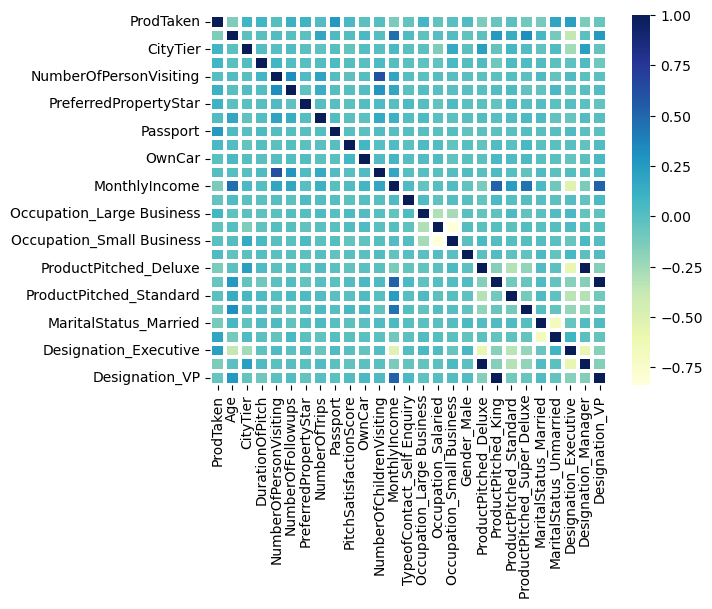

In [52]:
sns.heatmap(df.corr(), cmap="YlGnBu", fmt=".2f", linewidths=1.5)
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

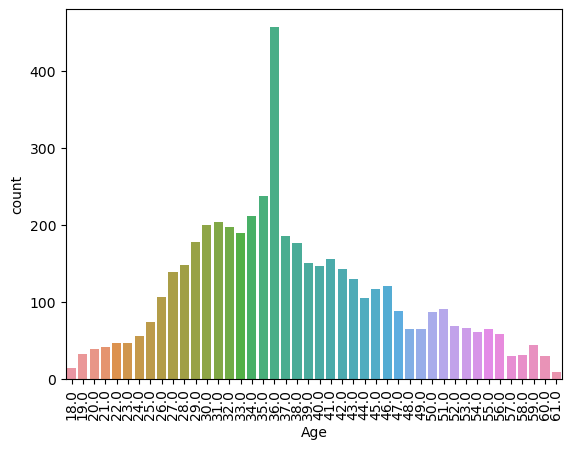

In [48]:
sns.countplot(x="Age", data=df)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
df['MonthlyIncome'].value_counts()

MonthlyIncome
23619.853491    233
20855.000000      7
21020.000000      7
21288.000000      7
17342.000000      7
               ... 
17074.000000      1
24250.000000      1
21077.000000      1
24714.000000      1
21471.000000      1
Name: count, Length: 2476, dtype: int64

C:\Users\Sharath\AppData\Local\Temp\ipykernel_5176\3453559960.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyIncome'])


<Axes: xlabel='MonthlyIncome', ylabel='Density'>

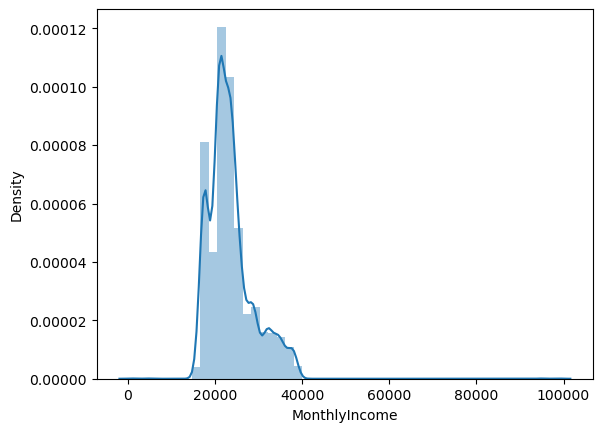

In [50]:
sns.distplot(df['MonthlyIncome'])

In [51]:
# Deleting independent variables having high correlation among one another
del df['Designation_Senior Manager']

## Logistic Regression on entire dataset

In [53]:
from sklearn.linear_model import LogisticRegression
X = df.drop("ProdTaken", axis=1)
Y = df['ProdTaken']

lm = LogisticRegression()
lm.fit(X,Y)
print(lm.intercept_, lm.coef_)

[-0.04303749] [[-2.86694082e-02  4.06180076e-01  2.29826840e-02 -8.45979181e-02
   3.77885410e-01  2.29460730e-01 -7.98007215e-02  6.86525750e-01
   5.89570966e-02 -1.81451861e-02 -8.06647196e-03 -1.46784714e-04
  -1.47107977e-01  9.23347486e-02 -9.59034339e-02 -4.40451437e-02
   3.97274457e-02 -3.50989907e-01  2.36693500e-02  6.51379531e-02
  -2.24637666e-02 -2.95357654e-01  4.12221334e-01  2.41601048e-01
  -3.50989907e-01  2.36693500e-02]]


E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
# Performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Predicting on test set
print(confusion_matrix(Y, lm.predict(X)))
print('Accuracy: ', accuracy_score(Y, lm.predict(X)))
print('ROC AUC Score: ', roc_auc_score(Y, lm.predict(X)))

[[3855  113]
 [ 679  241]]
Accuracy:  0.8379705400981997
ROC AUC Score:  0.6167393495792426


## Test-Train Split

In [56]:
X = df.drop("ProdTaken", axis=1)
Y = df['ProdTaken']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [59]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3910, 26) (978, 26) (3910,) (978,)


## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)

# Predicting on test set
print(confusion_matrix(Y_test, logistic.predict(X_test)))
print('Accuracy: ', accuracy_score(Y_test, logistic.predict(X_test)))
print('ROC AUC Score: ', roc_auc_score(Y_test, logistic.predict(X_test)))

[[789   9]
 [158  22]]
Accuracy:  0.8292433537832311
ROC AUC Score:  0.5554720133667502


## Linear Discriminant Analysis

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# Predicting on test set
print(confusion_matrix(Y_test, lda.predict(X_test)))
print('Accuracy: ', accuracy_score(Y_test, lda.predict(X_test)))
print('ROC AUC Score: ', roc_auc_score(Y_test, lda.predict(X_test)))

[[778  20]
 [130  50]]
Accuracy:  0.8466257668711656
ROC AUC Score:  0.6263575605680868


In [62]:
# Grid Search CV for tuning hyperparameters
from sklearn.model_selection import GridSearchCV

In [63]:
# Standardizing the variables
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s= scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s= scaler.transform(X_test)

## K-Nearest Neighbors

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
tuning = GridSearchCV(knn, params)
tuning.fit(X_train_s, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [65]:
tuning.best_params_

{'n_neighbors': 1}

In [66]:
optimised_KNN = tuning.best_estimator_

In [67]:
# Predicting on test set
print(confusion_matrix(Y_test, optimised_KNN.predict(X_test_s)))
print('Accuracy: ', accuracy_score(Y_test, optimised_KNN.predict(X_test_s)))
print('ROC AUC Score: ', roc_auc_score(Y_test, optimised_KNN.predict(X_test_s)))

[[769  29]
 [ 28 152]]
Accuracy:  0.941717791411043
ROC AUC Score:  0.9040517961570593


## Decision Tree

In [ ]:
from sklearn import tree
class_tree = tree.DecisionTreeClassifier(max_depth=3)
params = {'min_samples_split': [1, 2, 3, 4, 5, 6, 7]}
tuning = GridSearchCV(class_tree, params)
tuning.fit(X_train, Y_train)

In [69]:
tuning.best_params_

{'min_samples_split': 2}

In [70]:
optimised_tree = tuning.best_estimator_

In [71]:
# Predicting on test set
print(confusion_matrix(Y_test, optimised_tree.predict(X_test)))
print('Accuracy: ', accuracy_score(Y_test, optimised_tree.predict(X_test)))
print('ROC AUC Score: ', roc_auc_score(Y_test, optimised_tree.predict(X_test)))

[[787  11]
 [147  33]]
Accuracy:  0.8384458077709611
ROC AUC Score:  0.5847744360902256


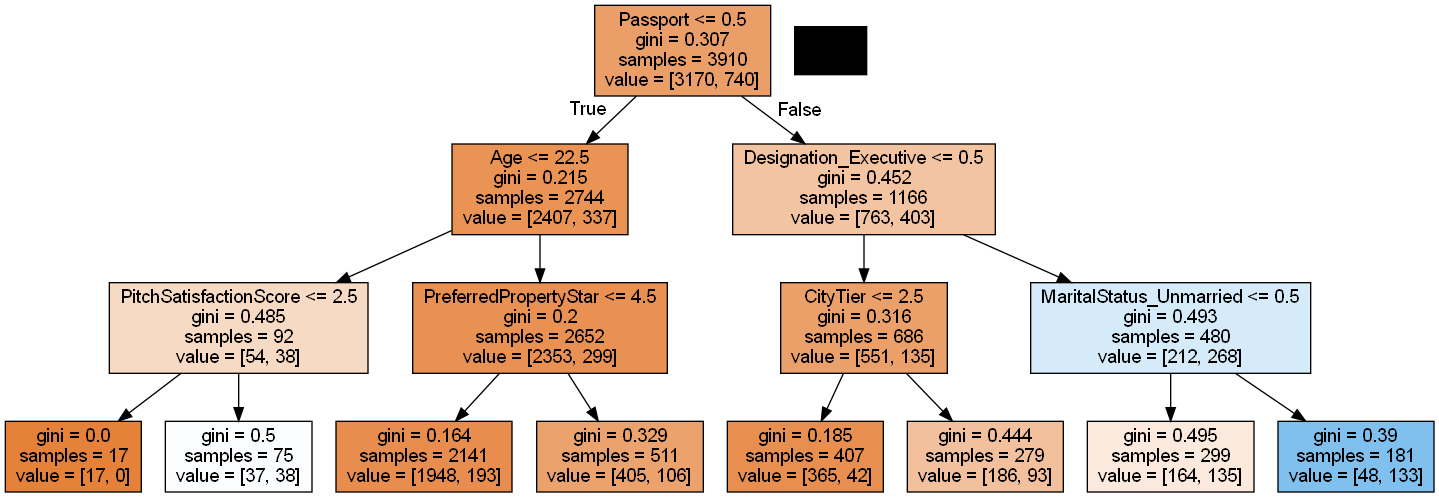

In [72]:
# Plotting the tree
dot_data = tree.export_graphviz(optimised_tree, out_file=None, filled=True, feature_names=X_train.columns)
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Bagging

In [73]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(estimator=class_tree, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=0)
bagging.fit(X_train, Y_train)

# Predicting on test set
print(confusion_matrix(Y_test, bagging.predict(X_test)))
print('Accuracy: ', accuracy_score(Y_test, bagging.predict(X_test)))
print('ROC AUC Score: ', roc_auc_score(Y_test, bagging.predict(X_test)))

[[784  14]
 [144  36]]
Accuracy:  0.8384458077709611
ROC AUC Score:  0.5912280701754385


## Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=0)
randomForest.fit(X_train, Y_train)

# Predicting on test set
print(confusion_matrix(Y_test, randomForest.predict(X_test)))
print('Accuracy: ', accuracy_score(Y_test, randomForest.predict(X_test)))
print('ROC AUC Score: ', roc_auc_score(Y_test, randomForest.predict(X_test)))

[[791   7]
 [ 67 113]]
Accuracy:  0.9243353783231084
ROC AUC Score:  0.8095029239766082


## Gradient Boost

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000, max_depth=1)
gbm.fit(X_train, Y_train)

# Predicting on test set
print(confusion_matrix(Y_test, gbm.predict(X_test)))
print('Accuracy: ', accuracy_score(Y_test, gbm.predict(X_test)))
print('ROC AUC Score: ', roc_auc_score(Y_test, gbm.predict(X_test)))

[[789   9]
 [148  32]]
Accuracy:  0.8394683026584867
ROC AUC Score:  0.583249791144528


## Adaptive Boost

In [76]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(learning_rate=0.05, n_estimators=5000)
adaboost.fit(X_train, Y_train)

# Predicting on test set
print(confusion_matrix(Y_test, adaboost.predict(X_test)))
print('Accuracy: ', accuracy_score(Y_test, adaboost.predict(X_test)))
print('ROC AUC Score: ', roc_auc_score(Y_test, adaboost.predict(X_test)))

[[773  25]
 [128  52]]
Accuracy:  0.843558282208589
ROC AUC Score:  0.6287802840434419


## XG Boost

In [77]:
import xgboost as xgb
xgboost = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3, n_jobs=-1)
xgboost.fit(X_train, Y_train)

# Predicting on test set
print(confusion_matrix(Y_test, xgboost.predict(X_test)))
print('Accuracy: ', accuracy_score(Y_test, xgboost.predict(X_test)))
print('ROC AUC Score: ', roc_auc_score(Y_test, xgboost.predict(X_test)))

[[788  10]
 [ 47 133]]
Accuracy:  0.941717791411043
ROC AUC Score:  0.8631787802840435


## Stacking Classifier

In [78]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('randomForest', RandomForestClassifier(n_estimators=1000, n_jobs=-1)),
    ('xgboost', xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3, n_jobs=-1))
]

stacking = StackingClassifier(estimators=estimators)
stacking.fit(X_train,Y_train)

# Predicting on test set
print(confusion_matrix(Y_test, stacking.predict(X_test)))
print('Accuracy: ', accuracy_score(Y_test, stacking.predict(X_test)))
print('ROC AUC Score: ', roc_auc_score(Y_test, stacking.predict(X_test)))

[[787  11]
 [ 33 147]]
Accuracy:  0.9550102249488752
ROC AUC Score:  0.9014411027568923


## Radial Kernel

In [79]:
from sklearn import svm
svc = svm.SVC(kernel='rbf')
params = {'C':(0.01,0.05, 0.1, 0.5, 1, 5, 10, 50), 
          'gamma':(0.001, 0.01, 0.1, 0.5, 1)} 

tuning = GridSearchCV(svc, params, n_jobs=-1, cv=3, verbose=1, scoring='accuracy') 
tuning.fit(X_train, Y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': (0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50),
                         'gamma': (0.001, 0.01, 0.1, 0.5, 1)},
             scoring='accuracy', verbose=1)

In [80]:
tuning.best_params_

{'C': 5, 'gamma': 0.1}

In [81]:
optimised_svc = tuning.best_estimator_

In [82]:
# Predicting on test set
print(confusion_matrix(Y_test, optimised_svc.predict(X_test)))
print('Accuracy: ', accuracy_score(Y_test, optimised_svc.predict(X_test)))
print('ROC AUC Score: ', roc_auc_score(Y_test, optimised_svc.predict(X_test)))

[[798   0]
 [ 89  91]]
Accuracy:  0.908997955010225
ROC AUC Score:  0.7527777777777778


## Polynomial Kernel

In [83]:
svcP = svm.SVC(kernel='poly')
params = {'degree':(1, 2, 3, 4), 
          'C':(0.001, 0.01, 0.1, 0.5, 1, 5, 10)} 

tuning = GridSearchCV(svcP, params, n_jobs=-1, cv=3, verbose=1, scoring='accuracy') 
tuning.fit(X_train, Y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': (0.001, 0.01, 0.1, 0.5, 1, 5, 10),
                         'degree': (1, 2, 3, 4)},
             scoring='accuracy', verbose=1)

In [84]:
tuning.best_params_

{'C': 0.001, 'degree': 1}

In [85]:
optimised_svcP = tuning.best_estimator_

In [86]:
# Predicting on test set
print(confusion_matrix(Y_test, optimised_svcP.predict(X_test)))
print('Accuracy: ', accuracy_score(Y_test, optimised_svcP.predict(X_test)))
print('ROC AUC Score: ', roc_auc_score(Y_test, optimised_svcP.predict(X_test)))

[[798   0]
 [180   0]]
Accuracy:  0.8159509202453987
ROC AUC Score:  0.5


## Linear Kernel

In [87]:
svcL = svm.SVC(kernel='poly')
params = {'C':(0.001, 0.01, 0.1, 0.5, 1, 5, 10)} 

tuning = GridSearchCV(svcL, params, n_jobs=-1, cv=3, verbose=1, scoring='accuracy') 
tuning.fit(X_train, Y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=3, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': (0.001, 0.01, 0.1, 0.5, 1, 5, 10)},
             scoring='accuracy', verbose=1)

In [88]:
tuning.best_params_

{'C': 0.001}

In [89]:
optimised_svcL= tuning.best_estimator_

In [90]:
# Predicting on test set
print(confusion_matrix(Y_test, optimised_svcL.predict(X_test)))
print('Accuracy: ', accuracy_score(Y_test, optimised_svcL.predict(X_test)))
print('ROC AUC Score: ', roc_auc_score(Y_test, optimised_svcL.predict(X_test)))

[[798   0]
 [180   0]]
Accuracy:  0.8159509202453987
ROC AUC Score:  0.5
